# The Canada/US Border Crossing Dataset


*Exploration of whether the variance in border crossings since 1972 is related to socio-economic indices*

## Load Data

**Import Libraries**

In [2]:
import pandas as pd #working with dataframes

**Load Data**

In [4]:
# Data accessed from: https://open.canada.ca/data/en/dataset/6e438d59-880a-4f5e-827d-6c35243cf10a
# Data accessed on: 2019-05-24

border_df_000 = pd.read_csv('24100002.csv')

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Dataset Versions**

* 000 - raw dataset
* 001 - reduce column 'Length of stay' to a single class 'Length of stay, total'
* 002 - remove columns with 1 or less unique elements/classes

## Data Exploration

In [35]:
border_df_003.head()

,REF_DATE,GEO,DGUID,Trip characteristics,VECTOR,COORDINATE,VALUE
1,1972-01,Canada,2016A000011124,Total United States vehicles entering,v129300,1.2.1.1,616944.0
8,1972-01,Canada,2016A000011124,Total Canadian vehicles returning,v129307,1.3.1.1,810082.0
16,1972-01,Nova Scotia,2016A000212,Total United States vehicles entering,v129315,2.2.1.1,164.0
23,1972-01,Nova Scotia,2016A000212,Total Canadian vehicles returning,v129322,2.3.1.1,129.0
31,1972-01,New Brunswick,2016A000213,Total United States vehicles entering,v129330,4.2.1.1,94865.0


### What are the number of unique elements for each column?

In [13]:
border_df_000.nunique()

REF_DATE                    567
GEO                         142
DGUID                        10
Trip characteristics          3
Length of stay                4
Mode of transportation        4
UOM                           1
UOM_ID                        1
SCALAR_FACTOR                 1
SCALAR_ID                     1
VECTOR                     2130
COORDINATE                 4260
VALUE                     78833
STATUS                        1
SYMBOL                        0
TERMINATED                    0
DECIMALS                      1
dtype: int64

*Any feature that has 1 or less unique elements can be removed, since there is no variance to explore*

## Look at the distribution of crossings

Lets create a barchart comparing the number of crossings for Canada and each Province/Territory and subdivide by citizenship

In [41]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

In [46]:
border_df_003.groupby(['DGUID','Trip characteristics'])['VALUE'].sum()

DGUID           Trip characteristics                 
2016A000011124  Total Canadian vehicles returning        1.023271e+09
                Total United States vehicles entering    6.583965e+08
2016A000212     Total Canadian vehicles returning        2.287280e+05
                Total United States vehicles entering    1.034486e+06
2016A000213     Total Canadian vehicles returning        1.269728e+08
                Total United States vehicles entering    5.001977e+07
2016A000224     Total Canadian vehicles returning        1.226729e+08
                Total United States vehicles entering    5.308858e+07
2016A000235     Total Canadian vehicles returning        4.876917e+08
                Total United States vehicles entering    4.431791e+08
2016A000246     Total Canadian vehicles returning        2.769922e+07
                Total United States vehicles entering    1.306882e+07
2016A000247     Total Canadian vehicles returning        1.057139e+07
                Total United States 

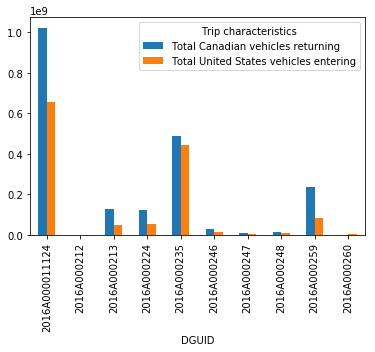

In [45]:
# Bar chart of crossings by Province/Territory


# source code for .unstack() : https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
border_df_003.groupby(['DGUID','Trip characteristics'])['VALUE'].sum().unstack().plot(kind = 'bar')

#plt.title(' ... ')
#plt.ylabel('...')
#plt.xlabel('...')

In [ ]:
# y-axis in bold
rc('font', weight='bold')

# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3,4]

# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1

# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Show graphic
plt.show()


## Data Munging

**Reduce 'Length of Stay' to a single class 'Total'**

In [20]:
border_df_001 = border_df_000[border_df_000['Length of stay'] == 'Length of stay, total']
print(border_df_000.shape)
print(border_df_001.shape)

(769590, 17)
(461754, 17)


*This reduced the number of rows by 40%*

**Drop columns that have 1 or less unique elements**

In [21]:
drop_nonunique = [] # create an empty list to put columns to be dropped in
column_unique = border_df_001.nunique() # shows the number of unique elements in each feature

for i in range(len(border_df_001.nunique())):
    if column_unique[i] <= 1: # if the number of unique elements in each feature is <= 1
        drop_nonunique.append(column_unique.index[i]) # add that column to the list

drop_nonunique    

['Length of stay',
 'UOM',
 'UOM_ID',
 'SCALAR_FACTOR',
 'SCALAR_ID',
 'STATUS',
 'SYMBOL',
 'TERMINATED',
 'DECIMALS']

In [22]:
border_df_002 = border_df_001.drop(drop_nonunique, axis = 1)
print(border_df_000.shape)
print(border_df_002.shape)

(769590, 17)
(461754, 8)


*This reduced the number of columns by 53%*

**Reduce 'Mode of transportation' to a single class 'Total'**

In [33]:
border_df_003 = border_df_002[border_df_002['Mode of transportation'] == 'Mode of transportation, total']
border_df_003 = border_df_003.drop(['Mode of transportation'], axis = 1)

border_df_003 = border_df_003[border_df_003['Trip characteristics'] != 'Total vehicles entering Canada']
print(border_df_000.shape)
print(border_df_003.shape)

(769590, 17)
(102612, 7)
